!["Red Car with Headlight Damage"](Images\red_car_crash.jpg)

# Logistic Regression of Chcago Car Crash Data for Financial Damage Assessment

## Business Problem/Question

Can we use factors from this dataset that are trackable by an insurance company to determining whether a private passenger vehicle crash in Chicago incurs property damage over $1,500 and can we make good predictions using these factors? 

## EDA

In [5]:
# Importing packages
import numpy as np
import pandas as pd 
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

### Read in and create new csv

The following section is loading and merging the datasets, as well as removing columns determined to be unnecessary.  This section has been commented out because the original data files are too large.  Only the resulting dataset is uploaded to the repository, and the next section begins by loading that merged dataset. 

In [6]:
# Read in data

#df_vehicles = pd.read_csv("Data\Traffic_Crashes_-_Vehicles_20231109.csv", parse_dates=["CRASH_DATE"], low_memory=False)
#df_people = pd.read_csv("Data\Traffic_Crashes_-_People_20231109.csv", parse_dates=["CRASH_DATE"], low_memory=False)
#df_crashes = pd.read_csv("Data\Traffic_Crashes_-_Crashes_20231109.csv", parse_dates=["CRASH_DATE"], low_memory=False)

In [7]:
# Filter out any data from before 2021

#df_crashes = df_crashes[df_crashes["CRASH_DATE"].dt.year >= 2021]
#df_people = df_people[df_people["CRASH_DATE"].dt.year >= 2021]
#df_vehicles = df_vehicles[df_vehicles["CRASH_DATE"].dt.year >= 2021]

Using the data dictionaries to understand column names, we are dropping columns from each set that are not relevant to the business problem.

In [8]:
# Drop columns from Vehicles dataframe

#df_vehicles.drop(columns = ['UNIT_NO', 'LIC_PLATE_STATE', 'TRAVEL_DIRECTION', 'MANEUVER',
#                            'TOWED_I', 'FIRE_I', 'TOWED_BY', 'TOWED_TO', 'AREA_00_I', 
#                            'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I', 'AREA_05_I', 
#                            'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 'AREA_10_I', 
#                            'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'FIRST_CONTACT_POINT', 'CMV_ID', 
#                            'USDOT_NO', 'CCMC_NO', 'ILCC_NO', 'COMMERCIAL_SRC', 'GVWR', 
#                            'CARRIER_NAME', 'CARRIER_STATE', 'CARRIER_CITY',
#                            'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO', 'HAZMAT_PRESENT_I', 
#                            'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO', 'MCS_REPORT_I',
#                            'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I', 'MCS_VIO_CAUSE_CRASH_I', 
#                            'IDOT_PERMIT_NO', 'WIDE_LOAD_I', 'TRAILER1_WIDTH', 'TRAILER2_WIDTH', 
#                            'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH',
#                            'AXLE_CNT', 'VEHICLE_CONFIG', 'CARGO_BODY_TYPE', 'LOAD_TYPE',
#                            'HAZMAT_OUT_OF_SERVICE_I', 'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS'],
#                            inplace=True)

In [9]:
# Drop columns from People dataframe

#df_people.drop(columns = ['PERSON_ID', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SAFETY_EQUIPMENT', 
#                          'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL', 
#                          'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
#                          'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE'], inplace=True)

In [10]:
# Drop columns from Crashes dataframe

#df_crashes.drop(columns = ['CRASH_DATE_EST_I', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 
#                           'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 
#                           'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'FIRST_CRASH_TYPE', 'LANE_CNT', 
#                           'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 
#                           'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 
#                           'STREET_DIRECTION', 'STREET_NAME', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 
#                           'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 
#                           'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 
#                           'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_MONTH', 
#                           'LATITUDE', 'LONGITUDE', 'LOCATION'], inplace=True) 

Because we are most interested in vehicle damage, we are using the Vehicles dataframe as the main and merging the others into it.

In [11]:
# Merge People dataframe with Vehicles dataframe

#df = df_vehicles.merge(df_people, how="left", on=["CRASH_RECORD_ID", "CRASH_DATE", "RD_NO", "VEHICLE_ID"])

In [12]:
# Merge Crashes dataframe with merged dataframe

#df = pd.merge(df, df_crashes, how = 'inner', on = ['CRASH_RECORD_ID', "CRASH_DATE", "RD_NO"])

In [13]:
# Exporting new dataframe to csv for use throughout rest of notebook

#df.to_csv("Data\chicago_traffic_accidents_2021_to_11-09-2023.csv")

### Working with a single merge dataset

In [14]:
# Can load merged dataframe without needing to go through above steps each time

df = pd.read_csv("Data\chicago_traffic_accidents_2021_to_11-09-2023.zip", 
                 parse_dates=["CRASH_DATE"], low_memory=False)

We don't need all the identifying columns as they are not useful in making a model. We will drop all of those now.

In [15]:
df.drop(columns = ["Unnamed: 0", "CRASH_UNIT_ID", "CRASH_RECORD_ID", 
                   "RD_NO", "VEHICLE_ID"], inplace=True)

We only want unique vehicle damage count, so we need to remove rows that represent passengers, as these will duplicate the vehicle damage. We also should remove any other rows that don't represent drivers. We can use the "PERSON_TYPE" column for this.

In [16]:
# Check values in Person_type column

df['PERSON_TYPE'].value_counts(normalize=True)

DRIVER                 0.780694
PASSENGER              0.197756
PEDESTRIAN             0.012899
BICYCLE                0.007730
NON-MOTOR VEHICLE      0.000760
NON-CONTACT VEHICLE    0.000162
Name: PERSON_TYPE, dtype: float64

In [17]:
# Remove all types of person except DRIVER

df = df[df['PERSON_TYPE'] == 'DRIVER']

In [18]:
# Sanity check

df['PERSON_TYPE'].value_counts(normalize=True)

DRIVER    1.0
Name: PERSON_TYPE, dtype: float64

### Missingness

Next we look at null values to try to determine which columns might need to be imputed or if the data is too incomplete to be useful. 

In [19]:
# First dropping columns that no longer have any data after removing all but DRIVER entries

df= df.dropna(axis=1, how="all")

In [20]:
# Looking at the total nulls left in remaining columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530319 entries, 0 to 766594
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_DATE               530319 non-null  datetime64[ns]
 1   UNIT_TYPE                530310 non-null  object        
 2   NUM_PASSENGERS           85079 non-null   float64       
 3   CMRC_VEH_I               10945 non-null   object        
 4   MAKE                     530098 non-null  object        
 5   MODEL                    530098 non-null  object        
 6   VEHICLE_YEAR             434488 non-null  float64       
 7   VEHICLE_DEFECT           530098 non-null  object        
 8   VEHICLE_TYPE             530098 non-null  object        
 9   VEHICLE_USE              530098 non-null  object        
 10  OCCUPANT_CNT             530098 non-null  float64       
 11  EXCEED_SPEED_LIMIT_I     9 non-null       object        
 12  PERSON_TYPE     

There are several columns that seem useful from the data dictionaries, but look almost entirely full of nulls. We do a value_counts for those columns to see what's in them.

In [21]:
# NUM_PASSENGERS

df["NUM_PASSENGERS"].value_counts(dropna=False)

NaN     445240
1.0      60610
2.0      15374
3.0       6037
4.0       2034
5.0        560
6.0        234
7.0         84
8.0         28
10.0        23
9.0         19
11.0        18
12.0        10
17.0         6
14.0         5
19.0         4
13.0         4
16.0         4
15.0         3
18.0         2
22.0         2
21.0         2
27.0         2
43.0         2
26.0         2
20.0         1
33.0         1
34.0         1
28.0         1
46.0         1
42.0         1
30.0         1
32.0         1
31.0         1
24.0         1
Name: NUM_PASSENGERS, dtype: int64

There is no 0 value, so the NaNs are problably 0. However, OCCUPANT_CNT represents the same information so we won't need this column. 

In [22]:
# CMRC_VEH_I

df["CMRC_VEH_I"].value_counts(dropna=False)

NaN    519374
Y        6602
N        4343
Name: CMRC_VEH_I, dtype: int64

This is a binary flag, but the missing values represent the overwhelming majority. We can drop the Y rows because they are commercial vehicles and do not fit the business problem, but the rest we will leave as we cannot make an assumption from such a small subset that the Y/N ratio is representative of the whole. 

In [23]:
# Dropping Commercial Vehicles

df = df[df["CMRC_VEH_I"]!="Y"]

In [24]:
# Sanity Check

df["CMRC_VEH_I"].value_counts(dropna=False)

NaN    519374
N        4343
Name: CMRC_VEH_I, dtype: int64

In [25]:
# EXCEED_SPEED_LIMIT_I

df["EXCEED_SPEED_LIMIT_I"].value_counts(dropna=False)

NaN    523708
N           5
Y           4
Name: EXCEED_SPEED_LIMIT_I, dtype: int64

This is a binary flag, but the missing values represent the overwhelming majority. We cannot make an assumption from such a small subset that the Y/N ratio is representative of the whole. This does not seem to be a useful column.

In [26]:
# AGE

df["AGE"].value_counts(dropna=False, normalize=True)

NaN      0.290504
28.0     0.020503
27.0     0.020442
29.0     0.020274
26.0     0.020207
           ...   
101.0    0.000010
102.0    0.000008
103.0    0.000006
98.0     0.000006
110.0    0.000004
Name: AGE, Length: 106, dtype: float64

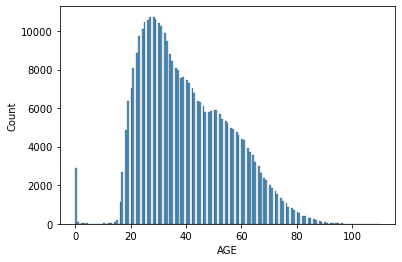

In [27]:
sns.histplot(df["AGE"]);

Missing values is a relatively large percentage of the whole at about 29%. There are many ages labeled 0, which may be another indicator of missingness. Also there are ages below the legal driving age of 15 which would not be included in an insurable class of people. We will drop ages unknown or below 15.

In [28]:
# Removing ages that could not drive legally or are unknown
df=df[df["AGE"]>14]

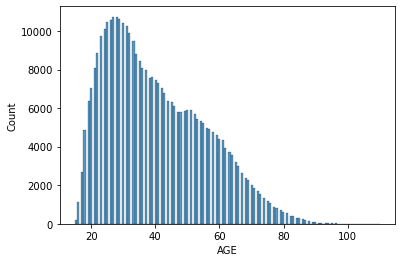

In [29]:
sns.histplot(df["AGE"]);

In [30]:
# CELL_PHONE_USE

df["CELL_PHONE_USE"].value_counts(dropna=False)

NaN    368278
N           1
Name: CELL_PHONE_USE, dtype: int64

This is a binary flag, but the missing values represent the overwhelming majority. We cannot make an assumption from such a small subset that the Y/N ratio is representative of the whole. This does not seem to be a useful column.

In [31]:
# Dropping all columns determined not to be useful

df.drop(columns = ["CMRC_VEH_I", "EXCEED_SPEED_LIMIT_I", "CELL_PHONE_USE"], inplace=True)

In [32]:
#Sanity Check

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368279 entries, 0 to 766594
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CRASH_DATE               368279 non-null  datetime64[ns]
 1   UNIT_TYPE                368277 non-null  object        
 2   NUM_PASSENGERS           72153 non-null   float64       
 3   MAKE                     368169 non-null  object        
 4   MODEL                    368169 non-null  object        
 5   VEHICLE_YEAR             353179 non-null  float64       
 6   VEHICLE_DEFECT           368169 non-null  object        
 7   VEHICLE_TYPE             368169 non-null  object        
 8   VEHICLE_USE              368169 non-null  object        
 9   OCCUPANT_CNT             368169 non-null  float64       
 10  PERSON_TYPE              368279 non-null  object        
 11  SEX                      368279 non-null  object        
 12  AGE             

### Compare Variables

In [33]:
# Check out the rest of the variables for weirdness

df.describe(include="all")

<ipython-input-33-b1800870b00c>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,CRASH_DATE,UNIT_TYPE,NUM_PASSENGERS,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,OCCUPANT_CNT,...,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,CRASH_HOUR,CRASH_DAY_OF_WEEK
count,368279,368277,72153.000000,368169,368169,353179.000000,368169,368169,368169,368169.000000,...,368279,368279.000000,352058,289274,368279,368279,368279,368279.000000,368279.000000,368279.000000
unique,173949,4,NaN,569,1609,NaN,17,20,23,NaN,...,3,NaN,173,172,3,38,38,NaN,NaN,NaN
top,2021-02-04 14:00:00,DRIVER,NaN,TOYOTA,OTHER (EXPLAIN IN NARRATIVE),NaN,NONE,PASSENGER,PERSONAL,NaN,...,M,NaN,IL,D,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,NaN,NaN,NaN
freq,27,368272,NaN,47180,34854,NaN,210259,249854,298071,NaN,...,217155,NaN,328802,255265,258705,123826,148618,NaN,NaN,NaN
first,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-11-09 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.467243,NaN,NaN,2013.767948,NaN,NaN,NaN,1.287110,...,NaN,40.274974,NaN,NaN,NaN,NaN,NaN,1250.812493,13.450628,4.150747
std,NaN,NaN,1.023336,NaN,NaN,56.012655,NaN,NaN,NaN,0.736437,...,NaN,15.473202,NaN,NaN,NaN,NaN,NaN,697.595774,5.326376,1.963749
min,NaN,NaN,1.000000,NaN,NaN,1900.000000,NaN,NaN,NaN,0.000000,...,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,111.000000,0.000000,1.000000
25%,NaN,NaN,1.000000,NaN,NaN,2009.000000,NaN,NaN,NaN,1.000000,...,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,725.000000,10.000000,2.000000


Look at VEHICLE_YEAR because max is 9999.

In [34]:
# First we'll see how many vehicles have vehicle years that are not possible

future_cars = df[df["VEHICLE_YEAR"] > 2024]
future_cars["VEHICLE_YEAR"].count()

185

In [35]:
# See if anything else is apparent about these rows

future_cars.head()

,CRASH_DATE,UNIT_TYPE,NUM_PASSENGERS,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,OCCUPANT_CNT,...,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,CRASH_HOUR,CRASH_DAY_OF_WEEK
773,2023-04-24 14:13:00,DRIVER,NaN,ACURA,ILX,2032.0,UNKNOWN,PASSENGER,PERSONAL,1.0,...,F,46.0,NaN,D,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,NOT APPLICABLE,123.0,14,2
1823,2023-08-18 16:00:00,DRIVER,NaN,HONDA,HR-V,2108.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,1.0,...,F,41.0,NaN,NaN,"$501 - $1,500",NOT APPLICABLE,NOT APPLICABLE,922.0,16,6
14367,2023-05-04 18:58:00,DRIVER,NaN,HONDA,ODYSSEY,2100.0,UNKNOWN,VAN/MINI-VAN,PERSONAL,1.0,...,F,48.0,IL,D,"OVER $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,632.0,18,5
15356,2023-05-05 15:00:00,DRIVER,NaN,GENERAL MOTORS CORPORATION (GMC),SAVANNAH,3009.0,UNKNOWN,PASSENGER,PERSONAL,1.0,...,M,64.0,IL,NaN,"$501 - $1,500",FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,1621.0,15,6
16494,2023-05-06 08:17:00,DRIVER,NaN,CHEVROLET,TRUCK,2066.0,NONE,PICKUP,PERSONAL,1.0,...,M,17.0,IL,D,"OVER $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,824.0,8,7


In [36]:
# Percent of rows with future VEHICLE_YEARS

len(future_cars)/len(df)*100

0.0502336543761659

In [37]:
# Nothing seems apparently off about these vehicles, 
# but as they are such a small percentage we will drop them out
# since there is no way to know the true vehicle years

df = df[df["VEHICLE_YEAR"] <= 2024]

In [38]:
# Looking at the first years now

df["VEHICLE_YEAR"].value_counts().sort_index()

1900.0       10
1901.0        2
1902.0        1
1929.0        1
1939.0        1
          ...  
2020.0    21306
2021.0    16804
2022.0    10193
2023.0     4279
2024.0      282
Name: VEHICLE_YEAR, Length: 71, dtype: int64

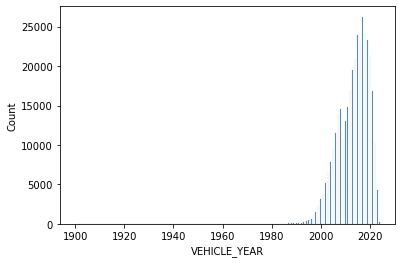

In [39]:
sns.histplot(df["VEHICLE_YEAR"]);

Anything over 25 years is considered a classic and can be insured as such. As most of the data falls within the last 25 years and anything older can be treated as a different insurance type, we will only use the last 25 years of data.

In [40]:
# Keeping only vehicles 25 years and newer

df=df[df["VEHICLE_YEAR"]>1997]

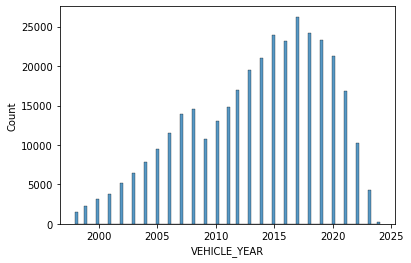

In [41]:
sns.histplot(df["VEHICLE_YEAR"]);

Looking at the rest of the columns.

In [42]:
df["VEHICLE_TYPE"].value_counts()

PASSENGER                                 239545
SPORT UTILITY VEHICLE (SUV)                57002
VAN/MINI-VAN                               15435
PICKUP                                     12229
UNKNOWN/NA                                  5829
TRUCK - SINGLE UNIT                         5595
BUS OVER 15 PASS.                           3983
OTHER                                       3857
TRACTOR W/ SEMI-TRAILER                     1908
BUS UP TO 15 PASS.                          1468
MOTORCYCLE (OVER 150CC)                      995
SINGLE UNIT TRUCK WITH TRAILER               497
OTHER VEHICLE WITH TRAILER                   448
TRACTOR W/O SEMI-TRAILER                     295
MOPED OR MOTORIZED BICYCLE                   129
AUTOCYCLE                                     21
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          21
ALL-TERRAIN VEHICLE (ATV)                     16
FARM EQUIPMENT                                12
RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)         1
Name: VEHICLE_TYPE, 

We're not interested in all these vehicle types, so we will remove everything that is explicitly not a passenger vehicle.

In [43]:
keep_vehicle = ["PASSENGER", "PICKUP", 
                "SPORT UTILITY VEHICLE (SUV)", 
                "UNKNOWN/NA", "VAN/MINI-VAN"]

In [44]:
df = df[df["VEHICLE_TYPE"].isin(keep_vehicle)]

In [45]:
# Sanity check

df["VEHICLE_TYPE"].value_counts()

PASSENGER                      239545
SPORT UTILITY VEHICLE (SUV)     57002
VAN/MINI-VAN                    15435
PICKUP                          12229
UNKNOWN/NA                       5829
Name: VEHICLE_TYPE, dtype: int64

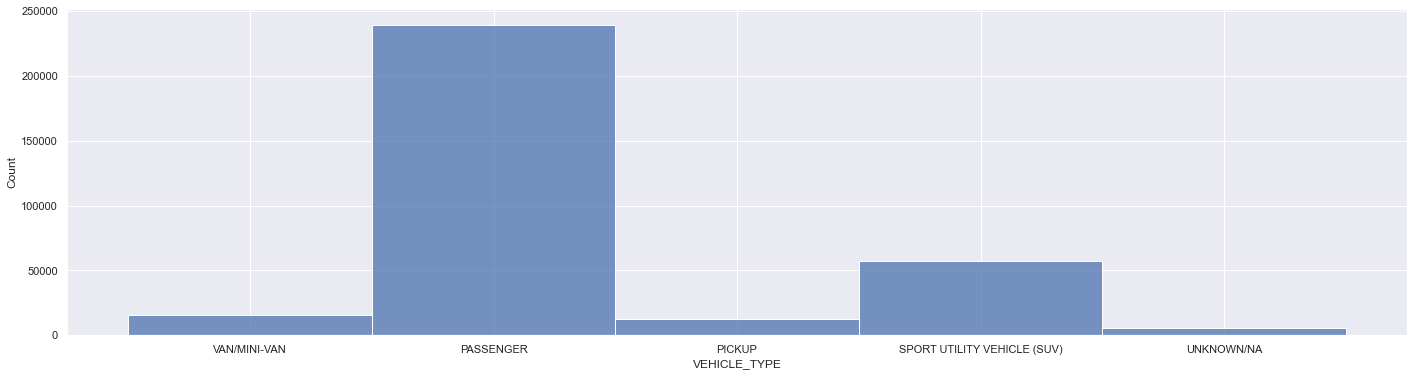

In [46]:
sns.set(rc={'figure.figsize':(24,6)})
sns.histplot(df["VEHICLE_TYPE"])
sns.set(rc={'figure.figsize':(5,4)})

It seems too lopsided to use in model, but it was useful to filter out Vehicle Types that do not fit the business problem. 

In [47]:
df["VEHICLE_USE"].value_counts(dropna=False)

PERSONAL                    282460
UNKNOWN/NA                   28345
OTHER                         6754
RIDESHARE SERVICE             3116
TAXI/FOR HIRE                 2669
POLICE                        2066
NOT IN USE                    1617
COMMERCIAL - SINGLE UNIT       932
CONSTRUCTION/MAINTENANCE       819
DRIVER EDUCATION               317
STATE OWNED                    165
TOW TRUCK                      157
AMBULANCE                      148
COMMERCIAL - MULTI-UNIT        132
CTA                            132
FIRE                            74
LAWN CARE/LANDSCAPING           65
SCHOOL BUS                      39
AGRICULTURE                     14
MILITARY                         9
CAMPER/RV - SINGLE UNIT          8
HOUSE TRAILER                    2
Name: VEHICLE_USE, dtype: int64

We only want personal vehicles, so we will remove the rest.

In [48]:
df = df[df["VEHICLE_USE"]=="PERSONAL"]

In [49]:
df["CRASH_DATE"].value_counts(dropna=False)

2021-02-04 14:00:00    20
2021-11-19 15:30:00    19
2022-02-17 17:00:00    19
2022-10-25 17:30:00    18
2021-12-10 16:00:00    18
                       ..
2023-06-30 20:12:00     1
2021-11-14 10:07:00     1
2022-11-01 06:45:00     1
2023-05-24 18:50:00     1
2022-06-18 10:25:00     1
Name: CRASH_DATE, Length: 150871, dtype: int64

We are not doing a time analysis, so this will not be used in our model. 

In [50]:
df["UNIT_TYPE"].value_counts(dropna=False)

DRIVER    282460
Name: UNIT_TYPE, dtype: int64

This corresponds to PERSON_TYPE. We will not use either in our model as it was used to filter the data.

In [51]:
df["MAKE"].value_counts(dropna=False)

TOYOTA         37325
CHEVROLET      35512
NISSAN         27359
HONDA          26949
FORD           25064
               ...  
KEN TRAILER        1
BERTONE            1
AUTOCAR            1
STERLING           1
SAFARI             1
Name: MAKE, Length: 136, dtype: int64

In [52]:
# 
topten=["TOYOTA", "CHEVROLET", "NISSAN", "HONDA", "FORD", "JEEP", "HYUNDAI", "DODGE", "KIA", "VOLKSWAGEN"]
df= df[df["MAKE"].isin(topten)]

This could be useful in our model. We filtered for the top 10 car makes to reduce noise.

In [53]:
df["MODEL"].value_counts(dropna=False)

OTHER (EXPLAIN IN NARRATIVE)    11285
CAMRY                            9953
COROLLA                          7432
CIVIC                            7033
ALTIMA                           6924
                                ...  
SUNLINER                            1
THE THING                           1
FOX                                 1
GREENBRIER                          1
E-TRANSIT                           1
Name: MODEL, Length: 379, dtype: int64

This could be useful. We may use it with MAKE and determine after filtering for top makes. Will need to avoid multicollinearity.

In [54]:
df["VEHICLE_DEFECT"].value_counts(dropna=False)

NONE                130141
UNKNOWN              79640
BRAKES                 898
OTHER                  858
TIRES                  180
STEERING               172
WHEELS                  87
SUSPENSION              62
ENGINE/MOTOR            49
FUEL SYSTEM             25
WINDOWS                 11
LIGHTS                   9
SIGNALS                  6
CARGO                    5
EXHAUST                  3
RESTRAINT SYSTEM         1
Name: VEHICLE_DEFECT, dtype: int64

Lot of UNKNOWN. Possibly useful, but even if we bin between NONE and all other variables the data would still be lopsided. Will not use in model.

In [55]:
df["OCCUPANT_CNT"].value_counts(dropna=False, normalize=True)

1.0     0.797395
2.0     0.142896
3.0     0.038162
4.0     0.014905
5.0     0.004893
6.0     0.001174
7.0     0.000457
8.0     0.000085
9.0     0.000024
11.0    0.000005
10.0    0.000005
Name: OCCUPANT_CNT, dtype: float64

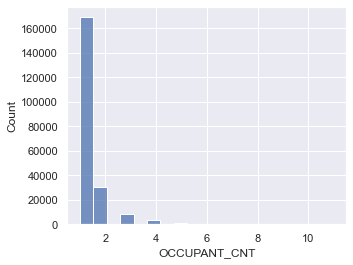

In [56]:
sns.histplot(df["OCCUPANT_CNT"]);

Could bin into HAS_PASSENGER but harder to track and implement for stakeholder. Would still be pretty lopsided. 

In [57]:
df["SEX"].value_counts(dropna=False, normalize=True)

M    0.547286
F    0.451748
X    0.000966
Name: SEX, dtype: float64

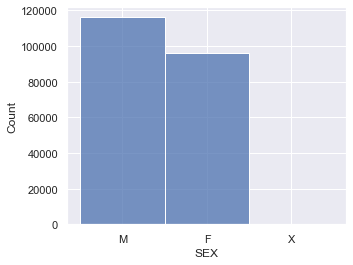

In [58]:
sns.histplot(df["SEX"]);

X is a small percentage and represents an unknown. We may drop later.

In [59]:
df["DRIVERS_LICENSE_STATE"].value_counts(dropna=False)

IL     190636
NaN      8905
IN       3332
WI       1044
MI        724
        ...  
OA          1
NN          1
SZ          1
CW          1
NW          1
Name: DRIVERS_LICENSE_STATE, Length: 151, dtype: int64

Bin for in state and out of state. 

In [60]:
df["DRIVERS_LICENSE_CLASS"].value_counts(dropna=False, normalize=True)

D      0.735820
NaN    0.203538
C      0.017912
A      0.013764
B      0.009013
         ...   
9A     0.000005
B2     0.000005
4      0.000005
DS     0.000005
CQ     0.000005
Name: DRIVERS_LICENSE_CLASS, Length: 132, dtype: float64

Data is lopsided and contains a fair bit missing.

In [61]:
df["BEAT_OF_OCCURRENCE"].value_counts(dropna=False, normalize=True)

813.0     0.011935
815.0     0.010427
833.0     0.010083
114.0     0.009842
1834.0    0.009244
            ...   
1125.0    0.000853
1653.0    0.000608
1655.0    0.000519
1652.0    0.000269
1650.0    0.000137
Name: BEAT_OF_OCCURRENCE, Length: 275, dtype: float64

Data not easily useable by stakeholder. May be useful for future projects.

In [62]:
df["CRASH_HOUR"].value_counts(dropna=False, normalize=True)

15    0.085903
16    0.084390
17    0.080520
14    0.068071
18    0.065374
13    0.060378
12    0.057220
8     0.053378
11    0.049277
19    0.046388
7     0.042801
10    0.042461
9     0.041726
20    0.037535
21    0.032492
22    0.028820
23    0.025690
6     0.018619
0     0.018591
1     0.015956
2     0.013519
5     0.011643
3     0.010120
4     0.009130
Name: CRASH_HOUR, dtype: float64

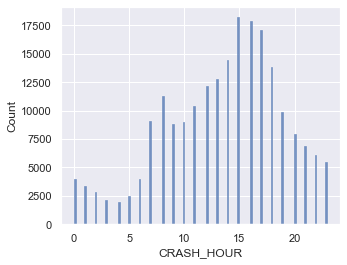

In [63]:
sns.histplot(df["CRASH_HOUR"]);

Bin to times of day.

In [64]:
df["CRASH_DAY_OF_WEEK"].value_counts(dropna=False, normalize=True)

6    0.166413
7    0.149462
5    0.145611
3    0.140935
4    0.140879
2    0.132380
1    0.124319
Name: CRASH_DAY_OF_WEEK, dtype: float64

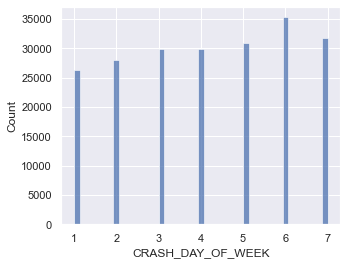

In [65]:
sns.histplot(df["CRASH_DAY_OF_WEEK"]);

Bin with CRASH_HOUR for times of day.

In [66]:
df["PRIM_CONTRIBUTORY_CAUSE"].value_counts(dropna=False)

UNABLE TO DETERMINE                                                                 67188
FAILING TO YIELD RIGHT-OF-WAY                                                       32626
FOLLOWING TOO CLOSELY                                                               24523
IMPROPER OVERTAKING/PASSING                                                         11293
FAILING TO REDUCE SPEED TO AVOID CRASH                                              11287
IMPROPER TURNING/NO SIGNAL                                                           9037
NOT APPLICABLE                                                                       8570
IMPROPER LANE USAGE                                                                  7298
DISREGARDING TRAFFIC SIGNALS                                                         6801
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  6741
IMPROPER BACKING                                                                     5860
WEATHER   

The only possibly useful data point is what can be known demographically before a crash. So DRIVING SKILLS/KNOWLEDGE/EXPERIENCE should be made into a flag.

In [67]:
df["SEC_CONTRIBUTORY_CAUSE"].value_counts(dropna=False)

NOT APPLICABLE                                                                      84464
UNABLE TO DETERMINE                                                                 71596
FAILING TO YIELD RIGHT-OF-WAY                                                        9643
FAILING TO REDUCE SPEED TO AVOID CRASH                                               8582
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  7583
FOLLOWING TOO CLOSELY                                                                7116
IMPROPER OVERTAKING/PASSING                                                          3613
IMPROPER LANE USAGE                                                                  3200
IMPROPER TURNING/NO SIGNAL                                                           3136
WEATHER                                                                              2784
DISREGARDING TRAFFIC SIGNALS                                                         1345
IMPROPER B

DRIVING SKILLS/KNOWLEDGE/EXPERIENCE used with same above for a flag.

## Feature Engineering

### Feature Engineering

Binning in state and out of state without losing the null values. We will impute after Train/Test Split.

In [68]:
states = sorted(df["DRIVERS_LICENSE_STATE"].value_counts().index)
states.remove('IL')

In [69]:
def in_state(row):
    if row['DRIVERS_LICENSE_STATE'] == 'IL':
        return 1
    elif row['DRIVERS_LICENSE_STATE'] in states:
        return 0

df['IN_STATE'] = df.apply(in_state, axis=1)

In [70]:
# Sanity check 

df["IN_STATE"].value_counts(dropna=False)

1.0    190636
0.0     12606
NaN      8905
Name: IN_STATE, dtype: int64

We are interested in "driving skills, knowledge, or experience" as a contributing cause of accidents.

In [71]:
(df['PRIM_CONTRIBUTORY_CAUSE'] == 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE').value_counts(normalize=True)

False    0.968225
True     0.031775
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: float64

In [72]:
(df['SEC_CONTRIBUTORY_CAUSE'] == 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE').value_counts(normalize=True)

False    0.964256
True     0.035744
Name: SEC_CONTRIBUTORY_CAUSE, dtype: float64

In [73]:
((df['PRIM_CONTRIBUTORY_CAUSE'] == 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE') & (df['SEC_CONTRIBUTORY_CAUSE'] == 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE')).value_counts(normalize=True)

False    0.994296
True     0.005704
dtype: float64

In [74]:
# Create a new column to identify any contributory cause as "driving skills/knowledge/experience"

def get_cause(row):
    if row['PRIM_CONTRIBUTORY_CAUSE'] == 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':
        return 1
    if row['SEC_CONTRIBUTORY_CAUSE'] == 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE':
        return 1
    else:
        return 0
df['DRIVING_SKILLS'] = df.apply(get_cause, axis=1)
   

In [75]:
df['DRIVING_SKILLS'].value_counts(normalize=True)

0    0.938184
1    0.061816
Name: DRIVING_SKILLS, dtype: float64

In [76]:
df.groupby("DRIVING_SKILLS").DAMAGE.value_counts(normalize=True)

DRIVING_SKILLS  DAMAGE       
0               OVER $1,500      0.718197
                $501 - $1,500    0.212960
                $500 OR LESS     0.068843
1               OVER $1,500      0.735169
                $501 - $1,500    0.190483
                $500 OR LESS     0.074348
Name: DAMAGE, dtype: float64

While DRIVING_SKILLS is a very lopsided value, there is an indication that it affects the DAMAGE.

We want to identify crashes by the time of day they occurred.

In [77]:
# Create a new column to identify the time of day crashes occurred

def hour(row):
    if (row['CRASH_HOUR'] < 7) or (row['CRASH_HOUR'] >23):
        return 'Evening/Overnight'
    elif (row['CRASH_DAY_OF_WEEK'] in range(2,7)) and (row['CRASH_HOUR'] in range(7,10)) or (row['CRASH_HOUR'] in range(16,19)):
        return 'Commute'
    elif row['CRASH_HOUR'] in range(19,24):
        return 'Evening/Overnight'
    else:
        return 'Daytime'
df['TIME_OF_DAY'] = df.apply(hour, axis=1)

In [78]:
df['TIME_OF_DAY'].value_counts(dropna=False, normalize=True)

Daytime              0.382287
Commute              0.349211
Evening/Overnight    0.268503
Name: TIME_OF_DAY, dtype: float64

In [79]:
# Check the values in Damage column

df['DAMAGE'].value_counts()

OVER $1,500      152586
$501 - $1,500     44884
$500 OR LESS      14677
Name: DAMAGE, dtype: int64

In [80]:
# Create a new column to identify damage as > $1500 or <= $1500

damage_dict = {'OVER $1,500':1, '$501 - $1,500':0, '$500 OR LESS':0}
df['DAMAGE_OVER_1500'] =  df.loc[:, ('DAMAGE')].map(damage_dict).copy()

In [81]:
# Sanity check

df['DAMAGE_OVER_1500'].value_counts()

1    152586
0     59561
Name: DAMAGE_OVER_1500, dtype: int64

<AxesSubplot:xlabel='DAMAGE', ylabel='Count'>

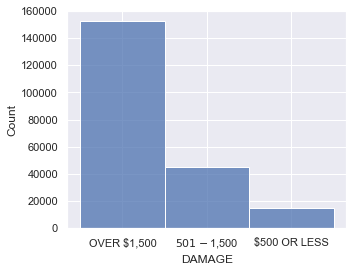

In [82]:
sns.histplot(df["DAMAGE"], )

In [83]:
df["DAMAGE"].value_counts(normalize=True)

OVER $1,500      0.719247
$501 - $1,500    0.211570
$500 OR LESS     0.069183
Name: DAMAGE, dtype: float64

<AxesSubplot:xlabel='DAMAGE_OVER_1500', ylabel='Count'>

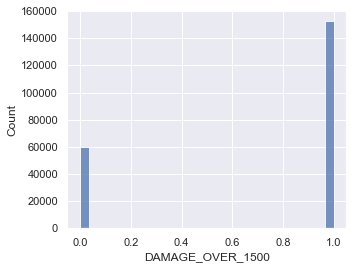

In [84]:
sns.histplot(df["DAMAGE_OVER_1500"])

### Comparing columns to DAMAGE_OVER_1500

In [85]:
df.groupby("AGE").DAMAGE_OVER_1500.value_counts().sort_values(ascending=False)

AGE    DAMAGE_OVER_1500
28.0   1                   4857
25.0   1                   4788
27.0   1                   4775
26.0   1                   4774
29.0   1                   4724
                           ... 
102.0  0                      1
103.0  1                      1
101.0  1                      1
98.0   1                      1
110.0  1                      1
Name: DAMAGE_OVER_1500, Length: 174, dtype: int64

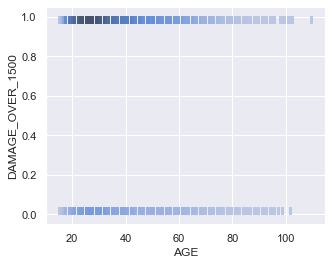

In [86]:
sns.histplot(x=df["AGE"], y=df["DAMAGE_OVER_1500"]);

In [87]:
df.groupby("VEHICLE_YEAR").DAMAGE_OVER_1500.value_counts().sort_values(ascending=False)

VEHICLE_YEAR  DAMAGE_OVER_1500
2017.0        1                   11823
2018.0        1                   11008
2015.0        1                   10521
2016.0        1                   10283
2019.0        1                   10238
2014.0        1                    9576
2013.0        1                    9032
2020.0        1                    8903
2012.0        1                    7806
2021.0        1                    7000
2011.0        1                    6856
2010.0        1                    6020
2007.0        1                    5853
2008.0        1                    5818
2009.0        1                    4848
2017.0        0                    4604
2006.0        1                    4479
2018.0        0                    4260
2019.0        0                    4218
2016.0        0                    4146
2015.0        0                    4131
2022.0        1                    4058
2005.0        1                    4033
2014.0        0                    3827
2013.0   

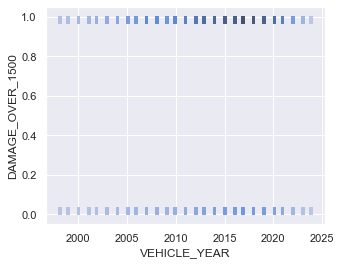

In [88]:
sns.histplot(x=df["VEHICLE_YEAR"], y=df["DAMAGE_OVER_1500"]);

In [89]:
df.groupby("TIME_OF_DAY").DAMAGE_OVER_1500.value_counts(normalize=True)

TIME_OF_DAY        DAMAGE_OVER_1500
Commute            1                   0.704525
                   0                   0.295475
Daytime            1                   0.698919
                   0                   0.301081
Evening/Overnight  1                   0.767336
                   0                   0.232664
Name: DAMAGE_OVER_1500, dtype: float64

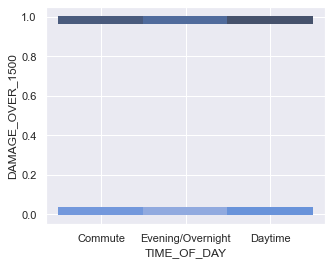

In [90]:
sns.histplot(x=df["TIME_OF_DAY"], y=df["DAMAGE_OVER_1500"]);

In [91]:
df.groupby("SEX").DAMAGE_OVER_1500.value_counts()

SEX  DAMAGE_OVER_1500
F    1                   68181
     0                   27656
M    1                   84266
     0                   31839
X    1                     139
     0                      66
Name: DAMAGE_OVER_1500, dtype: int64

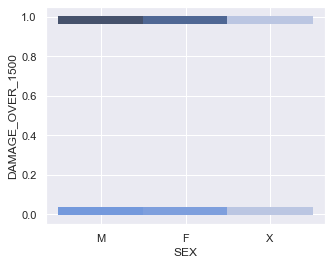

In [92]:
sns.histplot(x=df["SEX"], y=df["DAMAGE_OVER_1500"]);

In [93]:
df.groupby("IN_STATE").DAMAGE_OVER_1500.value_counts()

IN_STATE  DAMAGE_OVER_1500
0.0       1                     8899
          0                     3707
1.0       1                   137020
          0                    53616
Name: DAMAGE_OVER_1500, dtype: int64

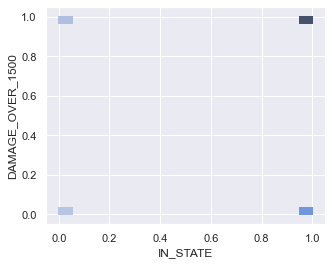

In [94]:
sns.histplot(x=df["IN_STATE"], y=df["DAMAGE_OVER_1500"]);

In [95]:
df.groupby("CRASH_HOUR").DAMAGE_OVER_1500.value_counts()

CRASH_HOUR  DAMAGE_OVER_1500
0           1                    3181
            0                     763
1           1                    2707
            0                     678
2           1                    2351
            0                     517
3           1                    1803
            0                     344
4           1                    1627
            0                     310
5           1                    1966
            0                     504
6           1                    3038
            0                     912
7           1                    6686
            0                    2394
8           1                    8053
            0                    3271
9           1                    6376
            0                    2476
10          1                    6426
            0                    2582
11          1                    7418
            0                    3036
12          1                    8420
            0        

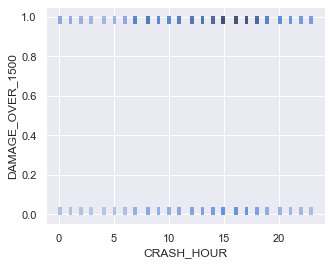

In [96]:
sns.histplot(x=df["CRASH_HOUR"], y=df["DAMAGE_OVER_1500"]);

## Initial Modeling

### Initial Dummy Model

#### Decide Xs/y

The target is DAMAGE_OVER_1500.

In [97]:
X = df.drop(["DAMAGE_OVER_1500"], axis=1)
y = df["DAMAGE_OVER_1500"]

#### Train/Test Split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2024)

#### Modeling 

In [99]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [100]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

We use accuracy score to compare all models with each other. We also use a confusion matrix to see the performance relative to false positives and false negatives. Finally, we plot the ROC curve to see visually if the models are improving in performance. 

In [101]:
y_pred = dummy_model.predict(X_test)
dummy1_accuracy = accuracy_score(y_test, y_pred)
dummy1_accuracy

0.7195542734317552

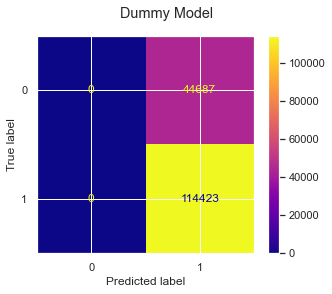

In [102]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

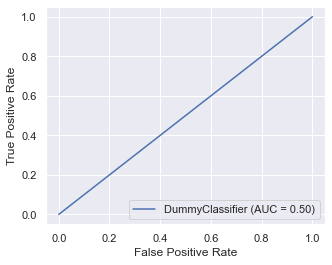

In [103]:
plot_roc_curve(dummy_model, X_train, y_train);

### Initial Decision Tree Classifier

In [104]:
# Making a dataframe of numeric columns

df_dt = df[["VEHICLE_YEAR", "SEX", "DRIVING_SKILLS", "TIME_OF_DAY", "DAMAGE_OVER_1500"]]

In [105]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212147 entries, 3 to 766594
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   VEHICLE_YEAR      212147 non-null  float64
 1   SEX               212147 non-null  object 
 2   DRIVING_SKILLS    212147 non-null  int64  
 3   TIME_OF_DAY       212147 non-null  object 
 4   DAMAGE_OVER_1500  212147 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 9.7+ MB


In [106]:
# Assigning Xs & y 

X_dt = df_dt.drop("DAMAGE_OVER_1500", axis=1)
y_dt = df["DAMAGE_OVER_1500"]

#### Train/Test Split

In [107]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, random_state=2024)

#### Preprocessing Steps (SS, OHE, SI)

In [108]:
df_dt.isna().sum()

VEHICLE_YEAR        0
SEX                 0
DRIVING_SKILLS      0
TIME_OF_DAY         0
DAMAGE_OVER_1500    0
dtype: int64

In [109]:
encoding = OneHotEncoder(categories="auto", handle_unknown="ignore")
X_train_dt_imp = encoding.fit_transform(X_train_dt)
X_test_dt_imp = encoding.transform(X_test_dt)
X_train_dt_imp.shape

(159110, 35)

In [110]:
names = pd.DataFrame(X_train_dt_imp.todense(), columns=encoding.get_feature_names())

#### Modeling 

In [111]:
dt = DecisionTreeClassifier(max_depth=2, random_state=2024)
dt.fit(X_train_dt_imp, y_train_dt)

DecisionTreeClassifier(max_depth=2, random_state=2024)

In [112]:
dt.score(X_train_dt_imp, y_train_dt)

0.7191439884356734

In [113]:
dt.score(X_test_dt_imp, y_test_dt)

0.7195542734317552

[Text(139.5, 181.2, 'X[34] <= 0.5\ngini = 0.404\nsamples = 159110\nvalue = [44687, 114423]'),
 Text(69.75, 108.72, 'X[30] <= 0.5\ngini = 0.418\nsamples = 116590\nvalue = [34753, 81837]'),
 Text(34.875, 36.23999999999998, 'gini = 0.396\nsamples = 7451\nvalue = [2026, 5425]'),
 Text(104.625, 36.23999999999998, 'gini = 0.42\nsamples = 109139\nvalue = [32727, 76412]'),
 Text(209.25, 108.72, 'X[27] <= 0.5\ngini = 0.358\nsamples = 42520\nvalue = [9934, 32586]'),
 Text(174.375, 36.23999999999998, 'gini = 0.353\nsamples = 25734\nvalue = [5897, 19837]'),
 Text(244.125, 36.23999999999998, 'gini = 0.365\nsamples = 16786\nvalue = [4037, 12749]')]

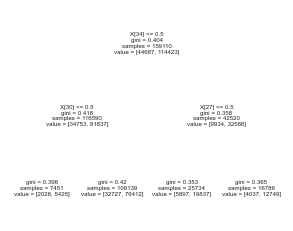

In [114]:
plot_tree(dt, max_depth=2)

In [115]:
names.columns[34]

'x3_Evening/Overnight'

There was no meaningful reduction in impurity when the sample was split, so the feature importance provided by the model is weak.

### Initial Logistic Regression with TIME_OF_DAY

#### Decide Xs/y

In [116]:
df_lr = df[["TIME_OF_DAY", "DAMAGE_OVER_1500"]]

In [117]:
X_lr = df_lr.drop("DAMAGE_OVER_1500", axis=1)
y_lr = df_lr["DAMAGE_OVER_1500"]

#### Train/Test Split

In [118]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, random_state=2024)

#### Preprocessing Steps (SS, OHE, SI)

In [119]:
X_train_lr_imp = encoding.fit_transform(X_train_lr)
X_test_lr_imp = encoding.transform(X_test_lr)

In [120]:
ss = StandardScaler(with_mean=False)

In [121]:
ss.fit_transform(X_train_lr_imp)
ss.transform(X_test_lr_imp)

<53037x3 sparse matrix of type '<class 'numpy.float64'>'
	with 53037 stored elements in Compressed Sparse Row format>

#### Modeling 

In [122]:
logreg = LogisticRegression(random_state=2024)

In [123]:
logreg.fit(X_train_lr_imp, y_train_lr)
y_pred_lr = logreg.predict(X_test_lr_imp)

We use accuracy score to compare all models with each other. We also use a confusion matrix to see the performance relative to false positives and false negatives. Finally, we plot the ROC curve to see visually if the models are improving in performance. For Logistic Regression models we also print the logloss, probability, and odds.

In [124]:
ToD1_accuracy = accuracy_score(y_test_lr, y_pred_lr)
ToD1_accuracy

0.7195542734317552

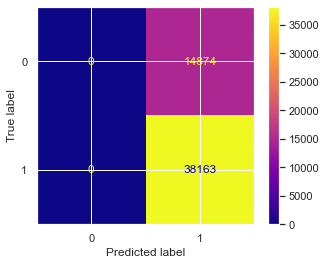

In [125]:
fig, ax = plt.subplots()
plot_confusion_matrix(logreg, X_test_lr_imp, y_test_lr, ax=ax, cmap="plasma");

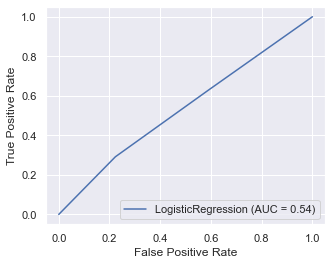

In [126]:
plot_roc_curve(logreg, X_test_lr_imp, y_test_lr);

In [127]:
log_loss(y_test_lr, logreg.predict_proba(X_test_lr_imp))

0.590948489720306

In [128]:
logreg.intercept_

array([0.72564711])

In [129]:
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds / (1 + odds)
prob

array([0.67384934])

In [130]:
odds

array([2.06606764])

## Evaluation of Initial Models

### Accuracy Scores of Initial Models

In [131]:
print("Baseline Accuracy:          ", round((dummy1_accuracy*100), ndigits=1), "%")
print("Time of Day LogReg Accuracy:", round((ToD1_accuracy*100), ndigits=1), "%")

Baseline Accuracy:           72.0 %
Time of Day LogReg Accuracy: 72.0 %


Decision Tree and Logistic Regression Accuracy scores are the same as the Dummy Model. We will undersample the majority class to see if it runs better.

## Balance Data and Redo Models

### Undersampling Majority to Balance Data

In [132]:
df["DAMAGE_OVER_1500"].value_counts()

1    152586
0     59561
Name: DAMAGE_OVER_1500, dtype: int64

In [133]:
over = df[df["DAMAGE_OVER_1500"]==1]
under = df[df["DAMAGE_OVER_1500"]==0]
over_small = over.sample(n=len(under), random_state=2024)
df = pd.concat([under, over_small],axis=0)

In [134]:
df["DAMAGE_OVER_1500"].value_counts()

1    59561
0    59561
Name: DAMAGE_OVER_1500, dtype: int64

### Dummy Model Redo

#### Decide Xs/y

The target is DAMAGE_OVER_1500. There are a few columns which represent interrelated variables, so only one will be used. 

In [135]:
X = df.drop(["DAMAGE", "DAMAGE_OVER_1500"], axis=1)
y = df["DAMAGE_OVER_1500"]

#### Train/Test Split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2024)

#### Modeling 

In [137]:
dummy_model = DummyClassifier(strategy="most_frequent")

In [138]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

We use accuracy score to compare all models with each other. We also use a confusion matrix to see the performance relative to false positives and false negatives. Finally, we plot the ROC curve to see visually if the models are improving in performance. 

In [139]:
y_pred = dummy_model.predict(X_test)
dummy2_accuracy = accuracy_score(y_test, y_pred)
dummy2_accuracy

0.4979685034082133

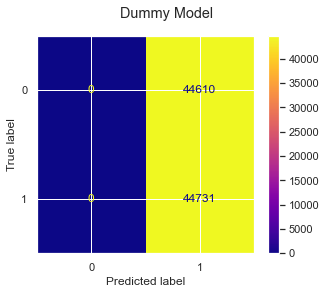

In [140]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

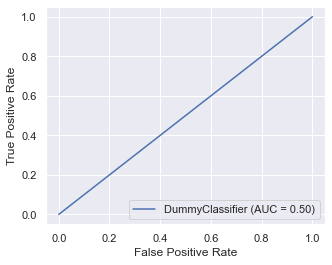

In [141]:
plot_roc_curve(dummy_model, X_train, y_train);

### Decision Tree Classifier Redo

In [142]:
# Making a dataframe from numeric columns

df_dt = df[["VEHICLE_YEAR", "SEX", "DRIVING_SKILLS", "TIME_OF_DAY", "DAMAGE_OVER_1500"]]

In [143]:
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119122 entries, 35 to 570737
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   VEHICLE_YEAR      119122 non-null  float64
 1   SEX               119122 non-null  object 
 2   DRIVING_SKILLS    119122 non-null  int64  
 3   TIME_OF_DAY       119122 non-null  object 
 4   DAMAGE_OVER_1500  119122 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.5+ MB


In [144]:
# Assigning Xs & y 

X_dt = df_dt.drop("DAMAGE_OVER_1500", axis=1)
y_dt = df["DAMAGE_OVER_1500"]

#### Train/Test Split

In [145]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, random_state=2024)

#### Preprocessing Steps (SS, OHE, SI)

In [146]:
df_dt.isna().sum()

VEHICLE_YEAR        0
SEX                 0
DRIVING_SKILLS      0
TIME_OF_DAY         0
DAMAGE_OVER_1500    0
dtype: int64

In [147]:
encoding = OneHotEncoder(categories="auto", handle_unknown="ignore")
X_train_dt_imp = encoding.fit_transform(X_train_dt)
X_test_dt_imp = encoding.transform(X_test_dt)

In [148]:
names = pd.DataFrame(X_train_dt_imp.todense(), columns=encoding.get_feature_names())

#### Modeling 

In [149]:
dt = DecisionTreeClassifier(max_depth=2, random_state=2024)
dt.fit(X_train_dt_imp, y_train_dt)

DecisionTreeClassifier(max_depth=2, random_state=2024)

In [150]:
dt.score(X_train_dt_imp, y_train_dt)

0.5318274924166956

In [151]:
dt.score(X_test_dt_imp, y_test_dt)

0.5330915684496826

[Text(139.5, 181.2, 'X[34] <= 0.5\ngini = 0.5\nsamples = 89341\nvalue = [44610, 44731]'),
 Text(69.75, 108.72, 'X[30] <= 0.5\ngini = 0.499\nsamples = 66557\nvalue = [34662, 31895]'),
 Text(34.875, 36.23999999999998, 'gini = 0.5\nsamples = 4116\nvalue = [2050, 2066]'),
 Text(104.625, 36.23999999999998, 'gini = 0.499\nsamples = 62441\nvalue = [32612, 29829]'),
 Text(209.25, 108.72, 'X[9] <= 0.5\ngini = 0.492\nsamples = 22784\nvalue = [9948, 12836]'),
 Text(174.375, 36.23999999999998, 'gini = 0.492\nsamples = 21951\nvalue = [9627, 12324]'),
 Text(244.125, 36.23999999999998, 'gini = 0.474\nsamples = 833\nvalue = [321, 512]')]

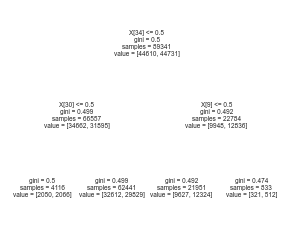

In [152]:
plot_tree(dt, max_depth=2)

In [153]:
names.columns[34]

'x3_Evening/Overnight'

This still showed no meaningful reduction in impurity when the sample was split, so the feature importance provided by the model is weak.

### Logistic Regression with TIME_OF_DAY Redo

#### Decide Xs/y

In [154]:
df_lr = df[["TIME_OF_DAY", "DAMAGE_OVER_1500"]]

In [155]:
X_lr = df_lr.drop("DAMAGE_OVER_1500", axis=1)
y_lr = df_lr["DAMAGE_OVER_1500"]

#### Train/Test Split

In [156]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, random_state=2024)

#### Preprocessing Steps (OHE, SS)

In [157]:
X_train_lr_imp = encoding.fit_transform(X_train_lr)
X_test_lr_imp = encoding.transform(X_test_lr)

In [158]:
ss = StandardScaler(with_mean=False)

In [159]:
ss.fit_transform(X_train_lr_imp)
ss.transform(X_test_lr_imp)

<29781x3 sparse matrix of type '<class 'numpy.float64'>'
	with 29781 stored elements in Compressed Sparse Row format>

#### Modeling 

In [160]:
logreg = LogisticRegression(random_state=2024)

In [161]:
logreg.fit(X_train_lr_imp, y_train_lr)
y_pred_lr = logreg.predict(X_test_lr_imp)

We use accuracy score to compare all models with each other. We also use a confusion matrix to see the performance relative to false positives and false negatives. Finally, we plot the ROC curve to see visually if the models are improving in performance. For Logistic Regression models we also print the logloss, probability, and odds.

In [162]:
ToD2_accuracy = accuracy_score(y_test_lr, y_pred_lr)
ToD2_accuracy

0.5307074980692388

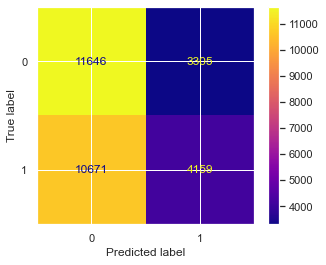

In [163]:
fig, ax = plt.subplots()
plot_confusion_matrix(logreg, X_test_lr_imp, y_test_lr, ax=ax, cmap="plasma");

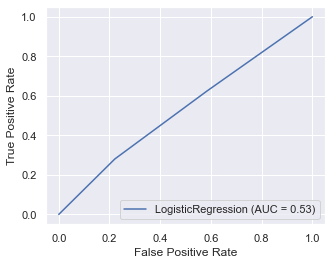

In [164]:
plot_roc_curve(logreg, X_test_lr_imp, y_test_lr);

In [165]:
log_loss(y_test_lr, logreg.predict_proba(X_test_lr_imp))

0.6907608662520238

In [166]:
logreg.intercept_

array([0.02251542])

In [167]:
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds / (1 + odds)
prob

array([0.50562862])

In [168]:
odds

array([1.0227708])

## New Models

### Logistic Regression with TIME_OF_DAY and SEX

#### Decide Xs/y

In [169]:
df_lr2 = df[["TIME_OF_DAY", "SEX", "DAMAGE_OVER_1500"]]

In [170]:
X_lr2 = df_lr2.drop("DAMAGE_OVER_1500", axis=1)
y_lr2 = df_lr2["DAMAGE_OVER_1500"]

#### Train/Test Split

In [171]:
X_train_lr2, X_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(X_lr2, y_lr2, random_state=2024)

#### Preprocessing Steps (SS, OHE)

In [172]:
X_train_lr2_imp = encoding.fit_transform(X_train_lr2)
X_test_lr2_imp = encoding.transform(X_test_lr2)

In [173]:
ss.fit_transform(X_train_lr2_imp)
ss.transform(X_test_lr2_imp)

<29781x6 sparse matrix of type '<class 'numpy.float64'>'
	with 59562 stored elements in Compressed Sparse Row format>

#### Modeling 

In [174]:
logreg.fit(X_train_lr2_imp, y_train_lr2)
y_pred_lr2 = logreg.predict(X_test_lr2_imp)

We use accuracy score to compare all models with each other. We also use a confusion matrix to see the performance relative to false positives and false negatives. Finally, we plot the ROC curve to see visually if the models are improving in performance. 

In [175]:
TS_accuracy = accuracy_score(y_test_lr2, y_pred_lr2)
TS_accuracy

0.5307074980692388

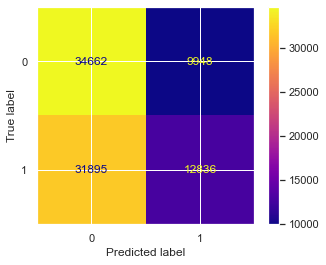

In [176]:
fig, ax = plt.subplots()
plot_confusion_matrix(logreg, X_train_lr2_imp, y_train_lr2, ax=ax, cmap="plasma");

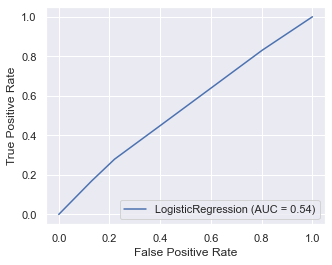

In [177]:
plot_roc_curve(logreg, X_test_lr2_imp, y_test_lr2);

In [178]:
log_loss(y_test_lr2, logreg.predict_proba(X_test_lr2_imp))

0.6906660756794217

In [179]:
logreg.intercept_

array([-0.02199234])

In [180]:
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds / (1 + odds)
prob

array([0.49450214])

In [181]:
odds

array([0.97824772])

### Logistic Regression with all Numeric

#### Decide Xs/y

In [182]:
df_lr3 = df_dt

In [183]:
X_lr3 = df_lr3.drop("DAMAGE_OVER_1500", axis=1)
y_lr3 = df_lr3["DAMAGE_OVER_1500"]

#### Train/Test Split

In [184]:
X_train_lr3, X_test_lr3, y_train_lr3, y_test_lr3 = train_test_split(X_lr3, y_lr3, random_state=2024)

#### Preprocessing Steps (SS, OHE)

In [185]:
X_train_lr3_imp = encoding.fit_transform(X_train_lr3)
X_test_lr3_imp = encoding.transform(X_test_lr3)

In [186]:
ss.fit_transform(X_train_lr3_imp)
ss.transform(X_test_lr3_imp)

<29781x35 sparse matrix of type '<class 'numpy.float64'>'
	with 119124 stored elements in Compressed Sparse Row format>

#### Modeling 

In [187]:
logreg = LogisticRegression(random_state=2024, max_iter=1000)

In [188]:
logreg.fit(X_train_lr3_imp, y_train_lr3)
y_pred_lr3 = logreg.predict(X_test_lr3_imp)

We use accuracy score to compare all models with each other. We also use a confusion matrix to see the performance relative to false positives and false negatives. Finally, we plot the ROC curve to see visually if the models are improving in performance. For Logistic Regression models we also print the logloss, probability, and odds.

In [189]:
num_accuracy = accuracy_score(y_test_lr3, y_pred_lr3)
num_accuracy

0.5298008797555488

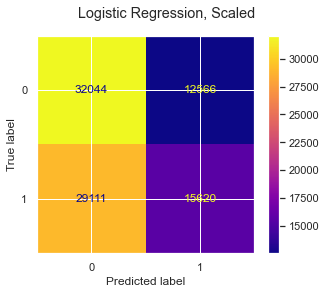

In [190]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression, Scaled")

plot_confusion_matrix(logreg, X_train_lr3_imp, y_train_lr3, ax=ax, cmap="plasma");

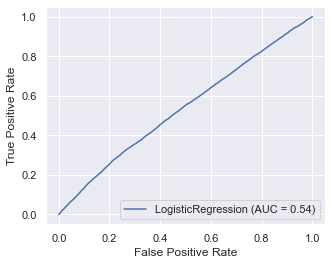

In [191]:
plot_roc_curve(logreg, X_test_lr3_imp, y_test_lr3);

In [192]:
log_loss(y_test_lr3, logreg.predict_proba(X_test_lr3_imp))

0.6906222716506103

In [193]:
logreg.intercept_

array([0.00639522])

In [194]:
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds / (1 + odds)
prob

array([0.5015988])

In [195]:
odds

array([1.00641571])

### Logistic Regression with All Columns

#### Decide Xs/y

In [196]:
dfall = df[["MAKE", "MODEL", "VEHICLE_YEAR", "VEHICLE_TYPE", "OCCUPANT_CNT", "SEX", "AGE", "IN_STATE", "DRIVING_SKILLS", "TIME_OF_DAY", "DAMAGE_OVER_1500"]]

In [197]:
X = dfall.drop("DAMAGE_OVER_1500", axis=1)
y = dfall["DAMAGE_OVER_1500"]

#### Train/Test Split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

#### Preprocessing Steps (SS, OHE, SI, MI)

##### Null Indicator

In [199]:
X_train.columns

Index(['MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_TYPE', 'OCCUPANT_CNT', 'SEX',
       'AGE', 'IN_STATE', 'DRIVING_SKILLS', 'TIME_OF_DAY'],
      dtype='object')

In [200]:
X_train.isna().sum()

MAKE                 0
MODEL                0
VEHICLE_YEAR         0
VEHICLE_TYPE         0
OCCUPANT_CNT         0
SEX                  0
AGE                  0
IN_STATE          3676
DRIVING_SKILLS       0
TIME_OF_DAY          0
dtype: int64

In [201]:
indicator = MissingIndicator(features="all")
indicator.fit(X_train)

MissingIndicator(features='all')

In [202]:
def add_missing_indicator_columns(X, indicator):
    """
    Helper function for transforming features
    
    For every feature in X, create another feature indicating whether that feature
    is missing. (This doubles the number of columns in X.)
    """
    
    # create a 2D array of True and False values indicating whether a given feature
    # is missing for that row
    missing_array_bool = indicator.transform(X)
    
    # transform into 1 and 0 for modeling
    missing_array_int = missing_array_bool.astype(int)
    
    # helpful for readability but not needed for modeling
    missing_column_names = [col + "_missing" for col in X.columns]
    
    # convert to df so it we can concat with X
    missing_df = pd.DataFrame(missing_array_int, columns=missing_column_names, index=X.index)
    
    return pd.concat([X, missing_df], axis=1)

In [203]:
X_train = add_missing_indicator_columns(X=X_train, indicator=indicator)

In [204]:
X_train.head()

,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_TYPE,OCCUPANT_CNT,SEX,AGE,IN_STATE,DRIVING_SKILLS,TIME_OF_DAY,MAKE_missing,MODEL_missing,VEHICLE_YEAR_missing,VEHICLE_TYPE_missing,OCCUPANT_CNT_missing,SEX_missing,AGE_missing,IN_STATE_missing,DRIVING_SKILLS_missing,TIME_OF_DAY_missing
162105,HYUNDAI,SANTA FE,2018.0,SPORT UTILITY VEHICLE (SUV),1.0,M,34.0,1.0,1,Commute,0,0,0,0,0,0,0,0,0,0
375248,TOYOTA,HIGHLANDER,2010.0,SPORT UTILITY VEHICLE (SUV),1.0,M,50.0,0.0,0,Daytime,0,0,0,0,0,0,0,0,0,0
243544,HYUNDAI,ELANTRA,2018.0,PASSENGER,3.0,M,47.0,1.0,0,Daytime,0,0,0,0,0,0,0,0,0,0
608379,HONDA,ODYSSEY,2002.0,VAN/MINI-VAN,1.0,F,48.0,1.0,1,Commute,0,0,0,0,0,0,0,0,0,0
87163,FORD,EXPLORER,2015.0,SPORT UTILITY VEHICLE (SUV),1.0,F,37.0,1.0,0,Commute,0,0,0,0,0,0,0,0,0,0


##### Simple Imputer

In [205]:
numeric_feature_names = ["VEHICLE_YEAR", "OCCUPANT_CNT", "AGE"]
categorical_feature_names = ["MAKE", "MODEL", "VEHICLE_TYPE", "SEX", "IN_STATE", "DRIVING_SKILLS", "TIME_OF_DAY"]

X_train_numeric = X_train[numeric_feature_names]
X_train_categorical = X_train[categorical_feature_names]

In [206]:
numeric_imputer = SimpleImputer()
numeric_imputer.fit(X_train_numeric)

SimpleImputer()

In [207]:
categorical_imputer = SimpleImputer(strategy="most_frequent")
categorical_imputer.fit(X_train_categorical)

SimpleImputer(strategy='most_frequent')

In [208]:
def impute_missing_values(X, imputer):
    """
    Given a DataFrame and an imputer, use the imputer to fill in all
    missing values in the DataFrame
    """
    imputed_array = imputer.transform(X)
    imputed_df = pd.DataFrame(imputed_array, columns=X.columns, index=X.index)
    return imputed_df

In [209]:
X_train_numeric = impute_missing_values(X_train_numeric, numeric_imputer)
X_train_categorical = impute_missing_values(X_train_categorical, categorical_imputer)

In [210]:
X_train_imputed = pd.concat([X_train_numeric, X_train_categorical], axis=1)
X_train_imputed.isna().sum()

VEHICLE_YEAR      0
OCCUPANT_CNT      0
AGE               0
MAKE              0
MODEL             0
VEHICLE_TYPE      0
SEX               0
IN_STATE          0
DRIVING_SKILLS    0
TIME_OF_DAY       0
dtype: int64

In [211]:
X_train_imputed.head()

,VEHICLE_YEAR,OCCUPANT_CNT,AGE,MAKE,MODEL,VEHICLE_TYPE,SEX,IN_STATE,DRIVING_SKILLS,TIME_OF_DAY
162105,2018.0,1.0,34.0,HYUNDAI,SANTA FE,SPORT UTILITY VEHICLE (SUV),M,1,1,Commute
375248,2010.0,1.0,50.0,TOYOTA,HIGHLANDER,SPORT UTILITY VEHICLE (SUV),M,0,0,Daytime
243544,2018.0,3.0,47.0,HYUNDAI,ELANTRA,PASSENGER,M,1,0,Daytime
608379,2002.0,1.0,48.0,HONDA,ODYSSEY,VAN/MINI-VAN,F,1,1,Commute
87163,2015.0,1.0,37.0,FORD,EXPLORER,SPORT UTILITY VEHICLE (SUV),F,1,0,Commute


In [212]:
X_train = X_train.drop(numeric_feature_names + categorical_feature_names, axis=1)
X_train = pd.concat([X_train_imputed, X_train], axis=1)

In [213]:
X_train.head()

,VEHICLE_YEAR,OCCUPANT_CNT,AGE,MAKE,MODEL,VEHICLE_TYPE,SEX,IN_STATE,DRIVING_SKILLS,TIME_OF_DAY,MAKE_missing,MODEL_missing,VEHICLE_YEAR_missing,VEHICLE_TYPE_missing,OCCUPANT_CNT_missing,SEX_missing,AGE_missing,IN_STATE_missing,DRIVING_SKILLS_missing,TIME_OF_DAY_missing
162105,2018.0,1.0,34.0,HYUNDAI,SANTA FE,SPORT UTILITY VEHICLE (SUV),M,1,1,Commute,0,0,0,0,0,0,0,0,0,0
375248,2010.0,1.0,50.0,TOYOTA,HIGHLANDER,SPORT UTILITY VEHICLE (SUV),M,0,0,Daytime,0,0,0,0,0,0,0,0,0,0
243544,2018.0,3.0,47.0,HYUNDAI,ELANTRA,PASSENGER,M,1,0,Daytime,0,0,0,0,0,0,0,0,0,0
608379,2002.0,1.0,48.0,HONDA,ODYSSEY,VAN/MINI-VAN,F,1,1,Commute,0,0,0,0,0,0,0,0,0,0
87163,2015.0,1.0,37.0,FORD,EXPLORER,SPORT UTILITY VEHICLE (SUV),F,1,0,Commute,0,0,0,0,0,0,0,0,0,0


In [214]:
X_train.isna().sum()

VEHICLE_YEAR              0
OCCUPANT_CNT              0
AGE                       0
MAKE                      0
MODEL                     0
VEHICLE_TYPE              0
SEX                       0
IN_STATE                  0
DRIVING_SKILLS            0
TIME_OF_DAY               0
MAKE_missing              0
MODEL_missing             0
VEHICLE_YEAR_missing      0
VEHICLE_TYPE_missing      0
OCCUPANT_CNT_missing      0
SEX_missing               0
AGE_missing               0
IN_STATE_missing          0
DRIVING_SKILLS_missing    0
TIME_OF_DAY_missing       0
dtype: int64

##### OHE

In [215]:
def encode_and_concat_feature_train(X_train, feature_name):
    """
    Helper function for transforming training data.  It takes in the full X dataframe and
    feature name, makes a one-hot encoder, and returns the encoder as well as the dataframe
    with that feature transformed into multiple columns of 1s and 0s
    """
    # make a one-hot encoder and fit it to the training data
    ohe = OneHotEncoder(categories="auto", handle_unknown="ignore")
    single_feature_df = X_train[[feature_name]]
    ohe.fit(single_feature_df)
    
    # call helper function that actually encodes the feature and concats it
    X_train = encode_and_concat_feature(X_train, feature_name, ohe)
    
    return ohe, X_train

In [216]:
def encode_and_concat_feature(X, feature_name, ohe):
    """
    Helper function for transforming a feature into multiple columns of 1s and 0s. Used
    in both training and testing steps.  Takes in the full X dataframe, feature name, 
    and encoder, and returns the dataframe with that feature transformed into multiple
    columns of 1s and 0s
    """
    # create new one-hot encoded df based on the feature
    single_feature_df = X[[feature_name]]
    feature_array = ohe.transform(single_feature_df).toarray()
    ohe_df = pd.DataFrame(feature_array, columns=ohe.categories_[0], index=X.index)
    
    # drop the old feature from X and concat the new one-hot encoded df
    X = X.drop(feature_name, axis=1)
    X = pd.concat([X, ohe_df], axis=1)
    
    return X

In [217]:
encoders = {}

for categorical_feature in categorical_feature_names:
    ohe, X_train = encode_and_concat_feature_train(X_train, categorical_feature)
    encoders[categorical_feature] = ohe

In [218]:
encoders

{'MAKE': OneHotEncoder(handle_unknown='ignore'),
 'MODEL': OneHotEncoder(handle_unknown='ignore'),
 'VEHICLE_TYPE': OneHotEncoder(handle_unknown='ignore'),
 'SEX': OneHotEncoder(handle_unknown='ignore'),
 'IN_STATE': OneHotEncoder(handle_unknown='ignore'),
 'DRIVING_SKILLS': OneHotEncoder(handle_unknown='ignore'),
 'TIME_OF_DAY': OneHotEncoder(handle_unknown='ignore')}

In [219]:
X_train.head()

,VEHICLE_YEAR,OCCUPANT_CNT,AGE,MAKE_missing,MODEL_missing,VEHICLE_YEAR_missing,VEHICLE_TYPE_missing,OCCUPANT_CNT_missing,SEX_missing,AGE_missing,...,F,M,X,0.0,1.0,0,1,Commute,Daytime,Evening/Overnight
162105,2018.0,1.0,34.0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
375248,2010.0,1.0,50.0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
243544,2018.0,3.0,47.0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
608379,2002.0,1.0,48.0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
87163,2015.0,1.0,37.0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [220]:
X_train.shape

(89341, 374)

##### Standard Scale

In [221]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [222]:
def scale_values(X, scaler):
    """
    Given a DataFrame and a fitted scaler, use the scaler to scale all of the features
    """
    scaled_array = scaler.transform(X)
    scaled_df = pd.DataFrame(scaled_array, columns=X.columns, index=X.index)
    return scaled_df

In [223]:
X_train = scale_values(X_train, scaler)

In [224]:
X_train.head()

,VEHICLE_YEAR,OCCUPANT_CNT,AGE,MAKE_missing,MODEL_missing,VEHICLE_YEAR_missing,VEHICLE_TYPE_missing,OCCUPANT_CNT_missing,SEX_missing,AGE_missing,...,F,M,X,0.0,1.0,0,1,Commute,Daytime,Evening/Overnight
162105,0.790177,-0.414301,-0.370700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913292,0.915191,-0.032106,-0.252383,0.252383,-3.916488,3.916488,1.340905,-0.799233,-0.581689
375248,-0.623975,-0.414301,0.653410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913292,0.915191,-0.032106,3.962228,-3.962228,0.255331,-0.255331,-0.745765,1.251200,-0.581689
243544,0.790177,2.564222,0.461389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913292,0.915191,-0.032106,-0.252383,0.252383,0.255331,-0.255331,-0.745765,1.251200,-0.581689
608379,-2.038128,-0.414301,0.525396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.094939,-1.092669,-0.032106,-0.252383,0.252383,-3.916488,3.916488,1.340905,-0.799233,-0.581689
87163,0.259870,-0.414301,-0.178679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.094939,-1.092669,-0.032106,-0.252383,0.252383,0.255331,-0.255331,1.340905,-0.799233,-0.581689


#### Model

In [225]:
logreg_model = LogisticRegression(random_state=2024)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=2024)

#### Test Evaluation 

Now that we have a final model, run X_test through all of the preprocessing steps so we can evaluate the model's performance

In [226]:
X_test_no_transformations = X_test.copy()

In [227]:
# add missing indicators
X_test_mi = add_missing_indicator_columns(X_test_no_transformations, indicator)

In [228]:
# separate out values for imputation
X_test_numeric = X_test_mi[numeric_feature_names]
X_test_categorical = X_test_mi[categorical_feature_names]

In [229]:
# impute missing values
X_test_numeric = impute_missing_values(X_test_numeric, numeric_imputer)
X_test_categorical = impute_missing_values(X_test_categorical, categorical_imputer)
X_test_imputed = pd.concat([X_test_numeric, X_test_categorical], axis=1)
X_test_new = X_test_mi.drop(numeric_feature_names + categorical_feature_names, axis=1)
X_test_final = pd.concat([X_test_imputed, X_test_new], axis=1)

In [230]:
# one-hot encode categorical data
for categorical_feature in categorical_feature_names:
    X_test_final = encode_and_concat_feature(X_test_final,
                                       categorical_feature, encoders[categorical_feature])

In [231]:
# scale values
X_test_scaled = scale_values(X_test_final, scaler)

In [232]:
X_test_scaled.head()

,VEHICLE_YEAR,OCCUPANT_CNT,AGE,MAKE_missing,MODEL_missing,VEHICLE_YEAR_missing,VEHICLE_TYPE_missing,OCCUPANT_CNT_missing,SEX_missing,AGE_missing,...,F,M,X,0.0,1.0,0,1,Commute,Daytime,Evening/Overnight
590209,0.790177,-0.414301,0.013341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.094939,-1.092669,-0.032106,-0.252383,0.252383,-3.916488,3.916488,1.340905,-0.799233,-0.581689
641322,0.966946,-0.414301,-0.498713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913292,0.915191,-0.032106,-0.252383,0.252383,0.255331,-0.255331,-0.745765,1.251200,-0.581689
562053,-0.977514,1.074960,-1.266795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.094939,-1.092669,-0.032106,-0.252383,0.252383,0.255331,-0.255331,-0.745765,-0.799233,1.719133
297242,0.966946,-0.414301,-1.010768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.913292,0.915191,-0.032106,-0.252383,0.252383,0.255331,-0.255331,-0.745765,1.251200,-0.581689
29284,-2.214897,-0.414301,-0.562720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.094939,-1.092669,-0.032106,-0.252383,0.252383,0.255331,-0.255331,-0.745765,-0.799233,1.719133


We use accuracy score to compare all models with each other. We also use a confusion matrix to see the performance relative to false positives and false negatives. Finally, we plot the ROC curve to see visually if the models are improving in performance. For Logistic Regression models we also print the logloss, probability, and odds.

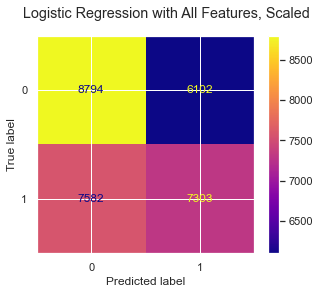

In [233]:
fig, ax = plt.subplots()

fig.suptitle("Logistic Regression with All Features, Scaled")

plot_confusion_matrix(logreg_model, X_test_scaled, y_test, ax=ax, cmap="plasma");

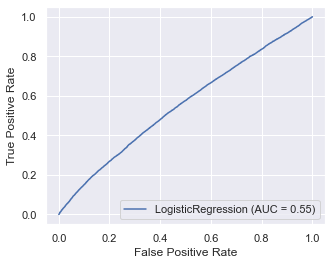

In [234]:
plot_roc_curve(logreg_model, X_test_scaled, y_test)

In [235]:
all_accuracy = accuracy_score(y_test, logreg_model.predict(X_test_scaled))
all_accuracy

0.5405124072395151

In [236]:
log_loss(y_test, logreg_model.predict_proba(X_test_scaled))

0.6955203837039959

In [237]:
logreg.intercept_

array([0.00639522])

In [238]:
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds / (1 + odds)
prob

array([0.5015988])

In [239]:
odds

array([1.00641571])

## Final Model Evaluations 

### Accuracy Score of New Models

In [240]:
print("Baseline Accuracy:                  ", round((dummy2_accuracy*100), ndigits=1), "%")
print("Time of Day LogReg Accuracy:        ", round((ToD2_accuracy*100), ndigits=1), "%")
print("Time of Day and Sex LogReg Accuracy:", round((TS_accuracy*100), ndigits=1), "%")
print("Numeric Columns LogReg Accuracy:    ", round((num_accuracy*100), ndigits=1), "%")
print("All Columns LogReg Accuracy:        ", round((all_accuracy*100), ndigits=1), "%")

Baseline Accuracy:                   49.8 %
Time of Day LogReg Accuracy:         53.1 %
Time of Day and Sex LogReg Accuracy: 53.1 %
Numeric Columns LogReg Accuracy:     53.0 %
All Columns LogReg Accuracy:         54.1 %


### Assessment

After balancing the data, the accuracy score of the Logistic Regression Model using only TIME_OF_DAY improved a small amount over baseline. Adding more columns to our model allowed it to improve marginally above that. Based on our business problem, we cannot say with a great amount of accuracy whether a crash will be above \$1500 in damage using only this data. However, we can see that the variable that most influences that outcome is TIME_OF_DAY. When we simply look at TIME_OF_DAY and DAMAGE_OVER_1500, we can see that accidents in the evening and overnight are about 8% more likely to cause damage over \$1500, compared to other times of day.

In [241]:
df.groupby("TIME_OF_DAY").DAMAGE_OVER_1500.value_counts(normalize=True)

TIME_OF_DAY        DAMAGE_OVER_1500
Commute            0                   0.515763
                   1                   0.484237
Daytime            0                   0.525887
                   1                   0.474113
Evening/Overnight  1                   0.561855
                   0                   0.438145
Name: DAMAGE_OVER_1500, dtype: float64